In [1]:
import pandas as pd
tweets = pd.read_csv("Tweetss.csv")

tweets.isnull().values.any()

tweets.shape

(14640, 2)

In [2]:
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


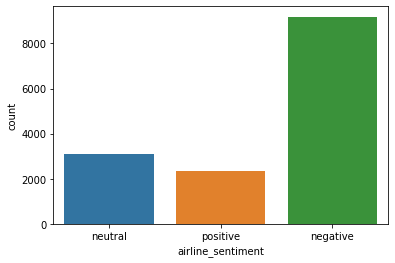

In [3]:
import seaborn as sns

sns.countplot(x='airline_sentiment', data=tweets)

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import GlobalMaxPooling1D
from keras.layers import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import LeakyReLU
from keras.layers import Activation,Conv1D,MaxPooling1D,Flatten
from keras.layers import Embedding,LSTM
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
#pre_treatment

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dark1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import re

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [7]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.add('http')
stemmer=nltk.stem.WordNetLemmatizer()
def text_prepare(text):

   
    remove_tags(text)  
    # text = re.sub('[^a-zA-Z]', ' ', text)# Remove punctuations and numbers
    # text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)# Single character removal
    # text = re.sub(r'\s+', ' ', text)# Removing multiple spaces
    text = text.lower()# lowercase text  
    text = re.sub(REPLACE_BY_SPACE_RE,' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = re.sub(BAD_SYMBOLS_RE,' ',text)# delete symbols which are in BAD_SYMBOLS_RE from text
    
    text = ' '.join(s for s in text.split() if s not in STOPWORDS)# delete stopwords from text  
    text = ' '.join(stemmer.lemmatize(token) for token in text.split())
    text = ''.join([i for i in text if not i.isdigit()])#delete numbers
    return text

In [8]:
X = []
sentences = list(tweets['text'])
for sen in sentences:
    X.append(text_prepare(sen))

In [9]:
X[3]

'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse'

In [10]:
import numpy as np

Y=tweets['airline_sentiment']
Y = np.array(Y)
Y=list(Y)

In [ ]:
#positiv=1 , negative 0 , neutral 2

In [11]:
for x,i in enumerate(Y) :
    if i=='positive' :
        Y[x]=1
    elif i=='neutral':
        Y[x]=2
    else :
        Y[x]=0     

In [12]:
Y=np.array(Y)
Y[4]

0

In [ ]:
#spliting data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [20]:
from collections import defaultdict

words_counts = defaultdict(int)
for text in X_train:
    for word in text.split():
        words_counts[word] += 1

In [21]:
#print(words_counts)

In [22]:
print(len(words_counts))

11245


In [ ]:
#bag of words

In [23]:
DICT_SIZE = 9016
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE]
WORDS_TO_INDEX = {p[0]:i for i,p in enumerate(most_common_words[:DICT_SIZE])}
def my_bag_of_words(text, words_to_index, dict_size):

    result_vector = np.zeros(dict_size)
    for word in text.split():
        if word in words_to_index:
            result_vector[words_to_index[word]] += 1
    return result_vector


In [24]:
#print(most_common_words)

In [25]:
#print(WORDS_TO_INDEX)

In [26]:
from scipy import sparse as sp_sparse
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])


X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])


In [27]:
print('X_train shape ', X_train_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (11712, 9016)
X_test shape  (2928, 9016)


In [28]:
print( X_train_mybag[1].shape)

(1, 9016)


In [ ]:
#tfidf

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
def tfidf_features(X_train, X_test):

    
    tfidf_vectorizer = TfidfVectorizer(min_df=3,max_df=0.80, ngram_range=(1,2))
    X_train = tfidf_vectorizer.fit_transform(X_train)   
    X_test = tfidf_vectorizer.transform(X_test)
    return X_train,X_test, tfidf_vectorizer.vocabulary_

In [34]:
X_train_tfidf,X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [ ]:
#word embedding

In [ ]:
#tokenization and turning words to sequences

In [35]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_tk = tokenizer.texts_to_sequences(X_train)
X_test_tk = tokenizer.texts_to_sequences(X_test)

In [36]:
print(X_train[3]) 

americanair flight  still sitting dfw waiting baggage loaded


In [37]:
print(X_test[3]) 

jetblue depart washington c


In [38]:
X_test_tk[3]

[6, 781, 1241, 198]

In [ ]:
#padding

In [39]:
maxlen=20
X_train_tk = pad_sequences(X_train_tk, padding='post', maxlen=maxlen)
X_test_tk = pad_sequences(X_test_tk, padding='post', maxlen=maxlen)

In [40]:
X_train_tk[3]

array([   4,    1,   25,  116,  140,   51,  101, 1050,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [ ]:
#importing the glove file

In [41]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.twitter.27B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
#creating the embedding matrix

In [42]:
vocab_size = len(tokenizer.word_index)+1

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
#creating one hot vector

In [43]:
from keras.utils import to_categorical
Y_train_oh = to_categorical(Y_train)
Y_test_oh= to_categorical(Y_test)
print(Y_train)

[0 0 1 ... 0 0 2]


In [44]:
print( len(embedding_matrix))
print(len(embedding_matrix[0]))

10822
100


In [ ]:
#class weight to balence the data

In [45]:
class_weight = {0: 1.,
                1: 4.,
                2: 3.}

In [46]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#logistic regression + bag of words

In [43]:
model = LogisticRegression()
model.fit(X_train_mybag,Y_train)

Y_pred_mybag=model.predict(X_test_mybag)



C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [44]:
from sklearn import metrics

In [45]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_mybag)
cnf_matrix

array([[1712,   47,  130],
       [  94,  321,   44],
       [ 208,   55,  317]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_mybag)

0.8025956284153005

In [ ]:
#logistic regression + tfidf

In [47]:
model.fit(X_train_tfidf,Y_train)

Y_pred_tfidf=model.predict(X_test_tfidf)



In [48]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[1797,   31,   61],
       [ 139,  278,   42],
       [ 310,   37,  233]], dtype=int64)

In [49]:
accuracy_score(Y_test, Y_pred_tfidf)

0.7882513661202186

In [ ]:
#logistic regression + word embedding

In [54]:
model.fit(X_train_tk,Y_train)

Y_pred_tfidf=model.predict(X_test_tk)

C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [55]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[1888,    0,    1],
       [ 458,    0,    1],
       [ 577,    0,    3]], dtype=int64)

In [56]:
accuracy_score(Y_test, Y_pred_tfidf)

0.6458333333333334

In [ ]:
# SVC + bag of words

In [57]:
from sklearn.svm import SVC

In [58]:
model = SVC(C=600)
model.fit(X_train_mybag,Y_train)

Y_pred_mybag=model.predict(X_test_mybag)


C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_mybag)
cnf_matrix

array([[1704,   47,  138],
       [ 100,  295,   64],
       [ 210,   51,  319]], dtype=int64)

In [60]:
accuracy_score(Y_test, Y_pred_mybag)

0.7916666666666666

In [ ]:
# SVC + tfidf

In [61]:

model.fit(X_train_tfidf,Y_train)

Y_pred_tfidf=model.predict(X_test_tfidf)


C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [62]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[1850,   24,   15],
       [ 213,  225,   21],
       [ 454,   24,  102]], dtype=int64)

In [63]:
accuracy_score(Y_test, Y_pred_tfidf)

0.7435109289617486

In [ ]:
# SVC + word embedding

In [64]:
model.fit(X_train_tk,Y_train)

Y_pred_tfidf=model.predict(X_test_tk)

C:\Users\dark1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[1872,    2,   15],
       [ 406,   45,    8],
       [ 525,    7,   48]], dtype=int64)

In [66]:
accuracy_score(Y_test, Y_pred_tfidf)

0.6711065573770492

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#randome forst + bag of words

In [68]:
model = RandomForestClassifier(600)
model.fit(X_train_mybag,Y_train)
Y_pred_rf=model.predict(X_test_mybag)

model.score(X_test_mybag,Y_test)

0.773224043715847

In [69]:
from sklearn import metrics

In [70]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_rf)
cnf_matrix

array([[1729,   44,  116],
       [ 120,  277,   62],
       [ 269,   53,  258]], dtype=int64)

In [71]:
accuracy_score(Y_test, Y_pred_rf)

0.773224043715847

In [ ]:
#randome forst + tfidf

In [72]:
model = RandomForestClassifier(600)
model.fit(X_train_tfidf,Y_train)
Y_pred_tfidf=model.predict(X_test_tfidf)

model.score(X_test_tfidf,Y_test)

0.7667349726775956

In [73]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[1760,   42,   87],
       [ 135,  261,   63],
       [ 311,   45,  224]], dtype=int64)

In [74]:
accuracy_score(Y_test, Y_pred_tfidf)

0.7667349726775956

In [ ]:
#randome forst + word embedding

In [75]:
model.fit(X_train_tk,Y_train)

Y_pred_tfidf=model.predict(X_test_tk)

In [76]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[1750,   34,  105],
       [ 286,  109,   64],
       [ 341,   56,  183]], dtype=int64)

In [77]:
accuracy_score(Y_test, Y_pred_tfidf)

0.6974043715846995

In [78]:
from sklearn import tree


In [ ]:
#decission tree + bag of words

In [79]:
model= tree.DecisionTreeClassifier()

In [80]:
model.fit(X_train_mybag,Y_train)

Y_pred_mybag=model.predict(X_test_mybag)


In [81]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_mybag)
cnf_matrix

array([[1498,  128,  263],
       [ 109,  278,   72],
       [ 245,   82,  253]], dtype=int64)

In [82]:
accuracy_score(Y_test, Y_pred_mybag)

0.692964480874317

In [ ]:
#decission tree + tfidf

In [83]:
model.fit(X_train_tfidf,Y_train)

Y_pred_tfidf=model.predict(X_test_tfidf)



In [84]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[1493,  139,  257],
       [ 109,  269,   81],
       [ 251,   86,  243]], dtype=int64)

In [85]:
accuracy_score(Y_test, Y_pred_tfidf)

0.6847677595628415

In [ ]:
#decission tree + word embedding

In [86]:
model.fit(X_train_tk,Y_train)

Y_pred_tfidf=model.predict(X_test_tk)

In [87]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_tfidf)
cnf_matrix

array([[1349,  241,  299],
       [ 198,  168,   93],
       [ 247,  109,  224]], dtype=int64)

In [88]:
accuracy_score(Y_test, Y_pred_tfidf)

0.594603825136612

In [ ]:
#deep learning

In [47]:
from keras import metrics

In [50]:
from sklearn import metrics
from sklearn.metrics import recall_score  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
import matplotlib. pyplot as plt

In [57]:
#word embedding + DNN

In [44]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.6))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',metrics.Recall(),metrics.Precision()])
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 100)           1239800   
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               256128    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)               

In [45]:
history = model.fit(X_train_tk, Y_train_oh, batch_size=32, epochs=10, verbose=1, validation_split=0.2,class_weight=class_weight )

Train on 9369 samples, validate on 2343 samples
Epoch 1/10
9369/9369 [==============================] - 5s 531us/step - loss: 2.1062 - acc: 0.3945 - recall_1: 0.6768 - precision_1: 0.3524 - val_loss: 1.9176 - val_acc: 0.6658 - val_recall_1: 0.9155 - val_precision_1: 0.3580
Epoch 2/10
9369/9369 [==============================] - 2s 201us/step - loss: 1.9871 - acc: 0.4953 - recall_1: 0.7420 - precision_1: 0.3975 - val_loss: 1.7149 - val_acc: 0.6884 - val_recall_1: 0.8263 - val_precision_1: 0.4979
Epoch 3/10
9369/9369 [==============================] - 2s 211us/step - loss: 1.8296 - acc: 0.5785 - recall_1: 0.7426 - precision_1: 0.4739 - val_loss: 1.6131 - val_acc: 0.7162 - val_recall_1: 0.8344 - val_precision_1: 0.5498
Epoch 4/10
9369/9369 [==============================] - 2s 217us/step - loss: 1.7730 - acc: 0.6080 - recall_1: 0.7671 - precision_1: 0.4910 - val_loss: 1.5836 - val_acc: 0.7260 - val_recall_1: 0.8263 - val_precision_1: 0.5130
Epoch 5/10
9369/9369 [==========================

In [46]:
pr = model.predict(X_test_tk)

In [48]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))
print(cnf_matrix)

[[1573  164  152]
 [  55  349   55]
 [ 217  111  252]]


In [49]:
recall_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.7424863387978142

In [50]:
mean_squared_error(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.6355874316939891

In [51]:
precision_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.7424863387978142

In [52]:
accuracy_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.7424863387978142

In [53]:
 import matplotlib. pyplot as plt

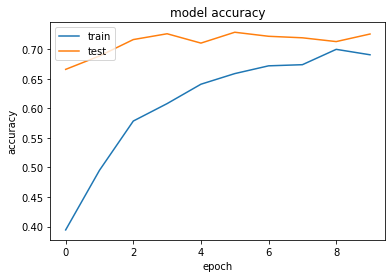

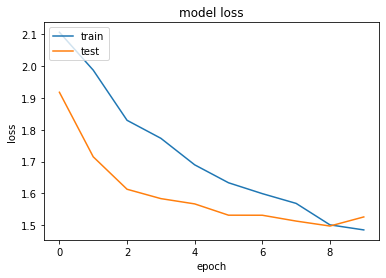

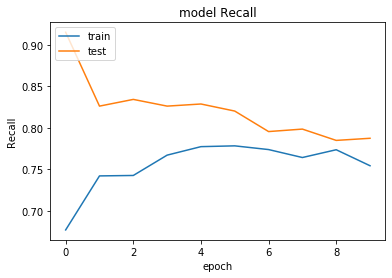

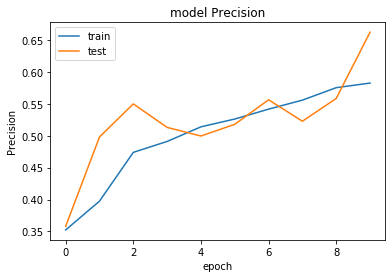

In [54]:
    
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])

plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])

plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [55]:
#cnn + word embedding

In [58]:
model= Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 2, activation='tanh'))
model.add(Conv1D(64, 2))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D())
model.add(Dropout(0.6))
model.add(Conv1D(32, 2,activation='tanh'))
model.add(Conv1D(16, 2))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D())
model.add(Dropout(0.6))
model.add(Conv1D(8, 2))
model.add(LeakyReLU(alpha=0.1))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.6))

model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',metrics.Recall(),metrics.Precision()])
print (model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 100)           1239800   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 19, 128)           25728     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 18, 64)            16448     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 18, 64)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 9, 64)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 9, 64)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 8, 32)            

In [59]:
history = model.fit(X_train_tk, Y_train_oh, batch_size=128, epochs=10, verbose=1, validation_split=0.2,class_weight=class_weight)

Train on 9369 samples, validate on 2343 samples
Epoch 1/10
9369/9369 [==============================] - 3s 333us/step - loss: 2.1587 - acc: 0.3232 - recall_2: 0.6787 - precision_2: 0.3488 - val_loss: 2.0775 - val_acc: 0.6108 - val_recall_2: 0.9612 - val_precision_2: 0.3775
Epoch 2/10
9369/9369 [==============================] - 2s 200us/step - loss: 2.0898 - acc: 0.3406 - recall_2: 0.7450 - precision_2: 0.3530 - val_loss: 2.0336 - val_acc: 0.5514 - val_recall_2: 0.8993 - val_precision_2: 0.3964
Epoch 3/10
9369/9369 [==============================] - 2s 194us/step - loss: 2.0497 - acc: 0.3478 - recall_2: 0.6682 - precision_2: 0.3561 - val_loss: 1.9623 - val_acc: 0.6231 - val_recall_2: 0.8673 - val_precision_2: 0.4324
Epoch 4/10
9369/9369 [==============================] - 2s 192us/step - loss: 1.9848 - acc: 0.3701 - recall_2: 0.6604 - precision_2: 0.3688 - val_loss: 1.8143 - val_acc: 0.6688 - val_recall_2: 0.8643 - val_precision_2: 0.4599
Epoch 5/10
9369/9369 [==========================

In [51]:
pr = model.predict(X_test_tk)

In [52]:
cnf_matrix = metrics.confusion_matrix(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))
print(cnf_matrix)

[[1535  145  209]
 [  35  378   46]
 [ 137  119  324]]


In [53]:
recall_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.7640027322404371

In [54]:
mean_squared_error(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.5905054644808743

In [55]:
precision_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.7640027322404371

In [56]:
accuracy_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.7640027322404371

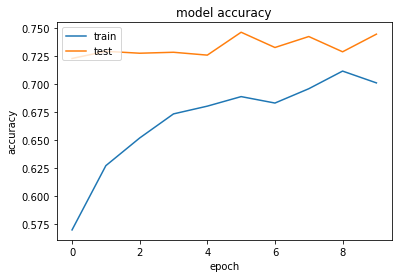

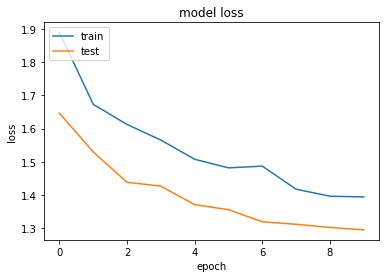

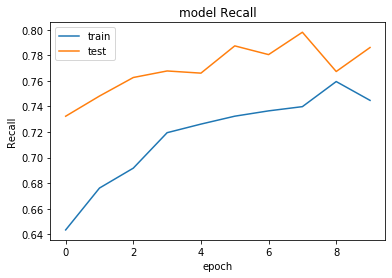

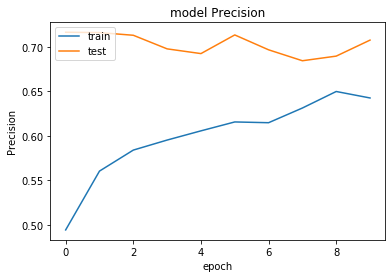

In [57]:
    
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])

plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])

plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [83]:
#lstm + word embedding

In [48]:

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128,return_sequences = True))
model.add(LSTM(64,return_sequences = True))

model.add(Dropout(0.6))
model.add(LSTM(32,return_sequences = True))
model.add(LSTM(16,return_sequences = True))
model.add(Dropout(0.6))
model.add(LSTM(8,return_sequences = False))
model.add(Dropout(0.6))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',metrics.Recall(),metrics.Precision()])
print (model.summary())




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 100)           1082200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 128)           117248    
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 64)            49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 32)            12416     
_________________________________________________________________
lstm_4 (LSTM)                (None, 20, 16)            3136      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 16)           

In [49]:
history = model.fit(X_train_tk, Y_train_oh, batch_size=128, epochs=10, verbose=1, validation_split=0.2,class_weight=class_weight)

Train on 9369 samples, validate on 2343 samples
Epoch 1/10
9369/9369 [==============================] - 22s 2ms/step - loss: 1.8908 - acc: 0.5695 - recall_1: 0.6434 - precision_1: 0.4945 - val_loss: 1.6465 - val_acc: 0.7230 - val_recall_1: 0.7324 - val_precision_1: 0.7162
Epoch 2/10
9369/9369 [==============================] - 16s 2ms/step - loss: 1.6732 - acc: 0.6271 - recall_1: 0.6762 - precision_1: 0.5605 - val_loss: 1.5295 - val_acc: 0.7294 - val_recall_1: 0.7482 - val_precision_1: 0.7158
Epoch 3/10
9369/9369 [==============================] - 17s 2ms/step - loss: 1.6125 - acc: 0.6518 - recall_1: 0.6917 - precision_1: 0.5840 - val_loss: 1.4379 - val_acc: 0.7277 - val_recall_1: 0.7627 - val_precision_1: 0.7128
Epoch 4/10
9369/9369 [==============================] - 18s 2ms/step - loss: 1.5654 - acc: 0.6734 - recall_1: 0.7195 - precision_1: 0.5953 - val_loss: 1.4263 - val_acc: 0.7286 - val_recall_1: 0.7678 - val_precision_1: 0.6976
Epoch 5/10
9369/9369 [==============================

In [75]:
pr = model.predict(X_test_tk)

In [76]:
cnf_matrix = metrics.confusion_matrix(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))
print(cnf_matrix)

[[1531  157  201]
 [  49  364   46]
 [ 147  107  326]]


In [77]:
recall_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.7585382513661202

In [78]:
mean_squared_error(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.5980191256830601

In [79]:
precision_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.7585382513661202

In [80]:
accuracy_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.7585382513661202

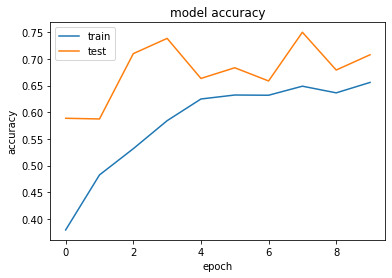

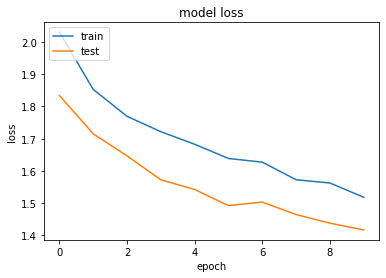

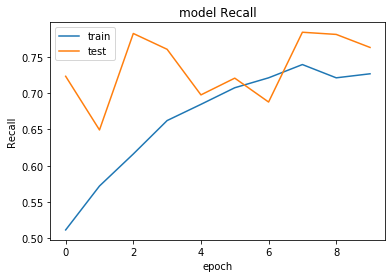

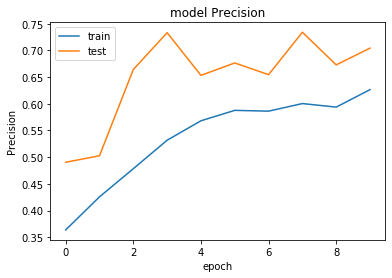

In [81]:
    
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['recall_3'])
plt.plot(history.history['val_recall_3'])

plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['precision_3'])
plt.plot(history.history['val_precision_3'])

plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [34]:
#tfidf + DNN

In [105]:
model = Sequential()

model.add(Dense(128,input_shape= (8190,), activation='tanh'))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))

model.add(Dense(8))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))

model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',metrics.Recall(),metrics.Precision()])
print (model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               1048448   
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 16)                528       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 16)              

In [99]:
history = model.fit(X_train_tfidf, Y_train_oh, batch_size=80, epochs=6, verbose=1, validation_split=0.2,class_weight=class_weight)

Train on 9369 samples, validate on 2343 samples
Epoch 1/6
9369/9369 [==============================] - 5s 531us/step - loss: 0.9530 - acc: 0.8420 - recall_5: 0.8489 - precision_5: 0.7796 - val_loss: 2.8213 - val_acc: 0.7529 - val_recall_5: 0.7546 - val_precision_5: 0.7514
Epoch 2/6
9369/9369 [==============================] - 5s 576us/step - loss: 0.8812 - acc: 0.8621 - recall_5: 0.8626 - precision_5: 0.7992 - val_loss: 2.9761 - val_acc: 0.7465 - val_recall_5: 0.7507 - val_precision_5: 0.7460
Epoch 3/6
9369/9369 [==============================] - 6s 615us/step - loss: 0.8334 - acc: 0.8771 - recall_5: 0.8735 - precision_5: 0.8147 - val_loss: 3.3526 - val_acc: 0.7486 - val_recall_5: 0.7512 - val_precision_5: 0.7477
Epoch 4/6
9369/9369 [==============================] - 6s 594us/step - loss: 0.7764 - acc: 0.8831 - recall_5: 0.8706 - precision_5: 0.8298 - val_loss: 3.4617 - val_acc: 0.7465 - val_recall_5: 0.7495 - val_precision_5: 0.7450
Epoch 5/6
9369/9369 [==============================]

In [90]:
pr = model.predict(X_test_tfidf)

In [91]:
cnf_matrix = metrics.confusion_matrix(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))
print(cnf_matrix)

[[1546   67  276]
 [  74  317   68]
 [ 170   74  336]]


In [92]:
recall_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.7510245901639344

In [93]:
mean_squared_error(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.7059426229508197

In [94]:
precision_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.7510245901639344

In [95]:
accuracy_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.7510245901639344

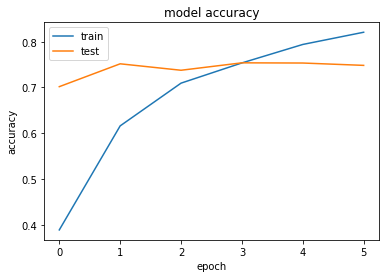

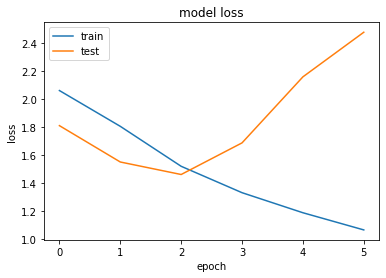

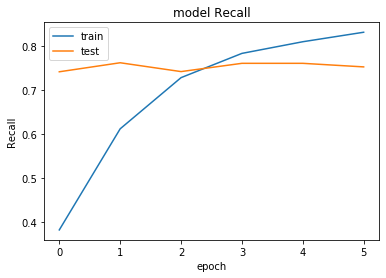

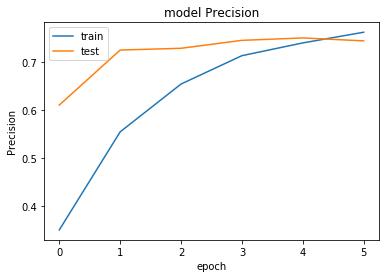

In [97]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['recall_5'])
plt.plot(history.history['val_recall_5'])

plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['precision_5'])
plt.plot(history.history['val_precision_5'])

plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [34]:
#bag of words + DNN
 

In [106]:
model = Sequential()

model.add(Dense(128,input_shape= (9016,), activation='tanh'))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))

model.add(Dense(8))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))

model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['acc',metrics.Recall(),metrics.Precision()])
print (model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               1154176   
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_44 (Dense)             (None, 16)                528       
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 16)              

In [107]:
history = model.fit(X_train_mybag, Y_train_oh, batch_size=80, epochs=6, verbose=1, validation_split=0.2,class_weight=class_weight)

Train on 9369 samples, validate on 2343 samples
Epoch 1/6
9369/9369 [==============================] - 6s 637us/step - loss: 2.0434 - acc: 0.4463 - recall_7: 0.4799 - precision_7: 0.3436 - val_loss: 1.8101 - val_acc: 0.7047 - val_recall_7: 0.7875 - val_precision_7: 0.5904
Epoch 2/6
9369/9369 [==============================] - 5s 568us/step - loss: 1.8371 - acc: 0.6319 - recall_7: 0.6241 - precision_7: 0.4759 - val_loss: 1.6430 - val_acc: 0.7281 - val_recall_7: 0.8126 - val_precision_7: 0.6168
Epoch 3/6
9369/9369 [==============================] - 5s 566us/step - loss: 1.6583 - acc: 0.7185 - recall_7: 0.7090 - precision_7: 0.5499 - val_loss: 1.6036 - val_acc: 0.7038 - val_recall_7: 0.8045 - val_precision_7: 0.5941
Epoch 4/6
9369/9369 [==============================] - 6s 605us/step - loss: 1.5246 - acc: 0.7512 - recall_7: 0.7612 - precision_7: 0.5859 - val_loss: 1.6666 - val_acc: 0.7098 - val_recall_7: 0.7977 - val_precision_7: 0.5954
Epoch 5/6
9369/9369 [==============================]

In [109]:
pr = model.predict(X_test_mybag)

In [110]:
cnf_matrix = metrics.confusion_matrix(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))
print(cnf_matrix)

[[1618  160  111]
 [  85  357   17]
 [ 194  318   68]]


In [111]:
recall_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.6977459016393442

In [112]:
mean_squared_error(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.6147540983606558

In [113]:
precision_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1),average='micro')

0.6977459016393442

In [114]:
accuracy_score(Y_test_oh.argmax(axis=1), pr.round().argmax(axis=1))

0.6977459016393442

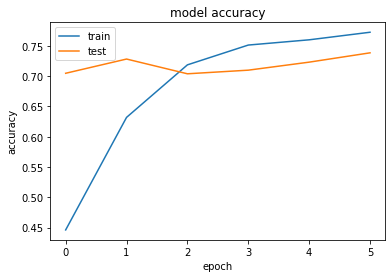

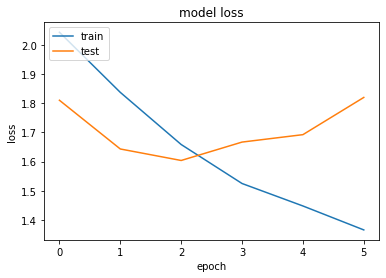

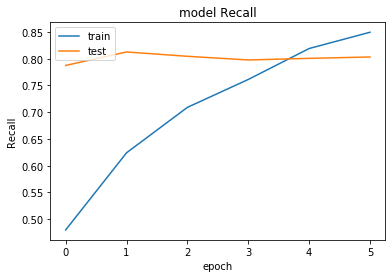

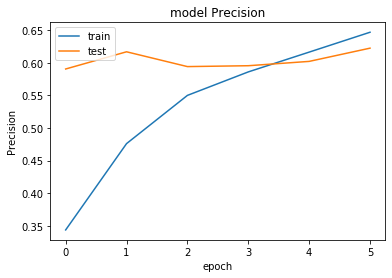

In [115]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['recall_7'])
plt.plot(history.history['val_recall_7'])

plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['precision_7'])
plt.plot(history.history['val_precision_7'])

plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()